In [ ]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [ ]:
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)} is available.")
else:
    print("No GPU available. Training will run on CPU.")

GPU: NVIDIA GeForce RTX 3060 Laptop GPU is available.


In [3]:
df = pd.read_csv("../Cleaned_Data/bbaw_egyptian_w_hieroglyphs.csv")

In [4]:
df.head()

,transcription,translation,hieroglyphs
0,"jr,j-pꜥ,t ḥꜣ,tj-ꜥ ḫtm,w-bj,tj smr-wꜥ,tj jm,j-r...","Hereditary noble and prince, royal seal-bearer...",D21 Q3 D36 F4 D36 L2 X1 S19 S29 U23 T21 X1 G17...
1,"j ꜥnḫ.w.pl tp,j.pl-tꜣ swꜣ.t =sn ḥr jz pn m-ḫdi...","O living ones, who are upon the earth, who sha...",M17 A26 S34 Aa1 G43 A1 Z3 h N17 N23 A1 Z2B S29...
2,"jnk mḥ-jb-n-nswt m ḥw,t-nṯr rʾ-Nḫn m pr Stj,t ...","I was a trusted one of the king in the temple,...",W24 V31 V22 F34 N35 M23 X1 N35 G17 R8 O6 X1 O1...
3,"ꜥq jb.pl ḥr-sꜣ mr,yt jm,j-rʾ-ꜥḥꜥ,w-wr-m-pr-nsw...","A trusted one upon the landing place, great ov...",G35 F34 F34 F34 D2 Z1 Aa17 U6 D21 M17 M17 X1 N...
4,"jw jri̯.n = jz m ḥz,t nswt sjqr.n wj ḥm =f m t...","I built a tomb through the favour of the king,...",M17 G43 D4 N35 M17 M40 O34 O1 Z1 G17 V28 W14 X...


In [5]:
df.isna().sum()

transcription      0
translation        7
hieroglyphs      251
dtype: int64

In [6]:
df.drop(columns=['translation'], inplace=True)

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

transcription    0
hieroglyphs      0
dtype: int64

In [9]:
df.to_csv("../Cleaned_Data/transcription_to_hieroglyphs.csv", index=False)

# More analysis

In [39]:
df = pd.read_csv("../Cleaned_Data/transcription_to_hieroglyphs.csv")

In [40]:
# calc number of n-grams in hieroglyphs and transcription
df['ngrams_hieroglyphs'] = df['hieroglyphs'].apply(lambda x: len(x.split()))
df['ngrams_transcription'] = df['transcription'].apply(lambda x: len(x.split()))

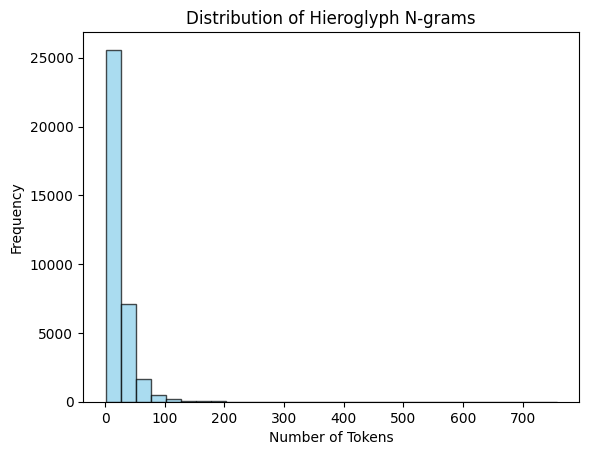

In [41]:
# plot the distribution of the number of n-grams of hieroglyphs
plt.hist(df['ngrams_hieroglyphs'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Hieroglyph N-grams')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()

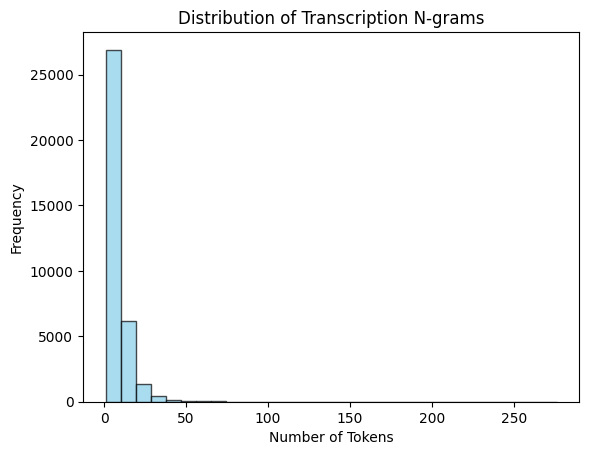

In [42]:
plt.hist(df['ngrams_transcription'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Transcription N-grams')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()

In [43]:
df['ngrams_transcription'].describe()

count    35252.000000
mean         8.091569
std          7.686147
min          1.000000
25%          4.000000
50%          6.000000
75%         10.000000
max        276.000000
Name: ngrams_transcription, dtype: float64

In [44]:
df['ngrams_hieroglyphs'].describe()

count    35252.000000
mean        22.368461
std         22.683284
min          1.000000
25%          9.000000
50%         16.000000
75%         28.000000
max        757.000000
Name: ngrams_hieroglyphs, dtype: float64